# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

Load feature names.

In [30]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        #print line
        [index, name, junk] = line.split()
      
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)
print feature_names

Loaded feature names: 126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-colo

Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [31]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        
        items = line.split()
        
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape
print train_data

(7000L, 126L) (1124L, 126L)
[[ 0.  0.  1. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [32]:
def P1():
### STUDENT START ###
    k_list = range(1,50)
    for k in k_list:
        pc = PCA(n_components=k)
        pc.fit(train_data)
        print "The variance ratio with k = %d" %k
        print sum(pc.explained_variance_ratio_)

### STUDENT END ###

P1()

The variance ratio with k = 1
0.164043312793
The variance ratio with k = 2
0.297278101488
The variance ratio with k = 3
0.399012666709
The variance ratio with k = 4
0.469646231052
The variance ratio with k = 5
0.508312676175
The variance ratio with k = 6
0.545120723595
The variance ratio with k = 7
0.57640281909
The variance ratio with k = 8
0.603738018421
The variance ratio with k = 9
0.629905300445
The variance ratio with k = 10
0.652214205005
The variance ratio with k = 11
0.672690333382
The variance ratio with k = 12
0.691379304212
The variance ratio with k = 13
0.708683210026
The variance ratio with k = 14
0.725251812869
The variance ratio with k = 15
0.740664381589
The variance ratio with k = 16
0.755725852279
The variance ratio with k = 17
0.769976351841
The variance ratio with k = 18
0.784198412005
The variance ratio with k = 19
0.797354104882
The variance ratio with k = 20
0.808923776734
The variance ratio with k = 21
0.819566575888
The variance ratio with k = 22
0.83021340514

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

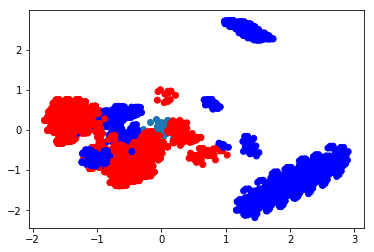

In [4]:
def P2():
### STUDENT START ###
    k=2
    pc = PCA(n_components=k)
    train_two_comps = pc.fit_transform(train_data)

    plt.scatter(pc.components_[0],pc.components_[1])
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    plt.scatter(train_two_comps[:,0],train_two_comps[:,1],c=train_labels, cmap=cm_bright)

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

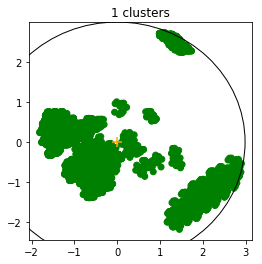

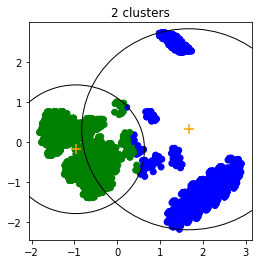

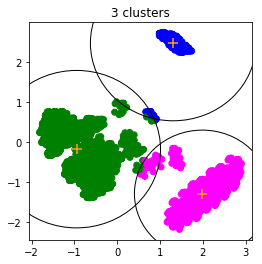

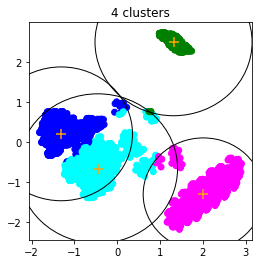

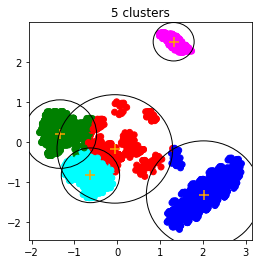

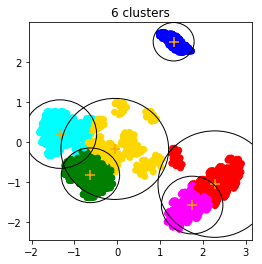

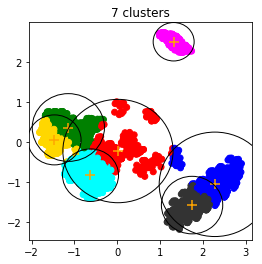

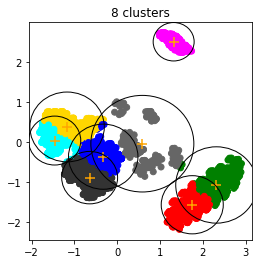

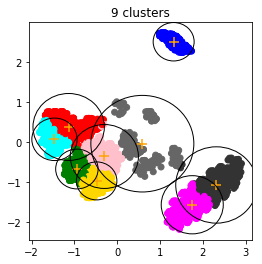

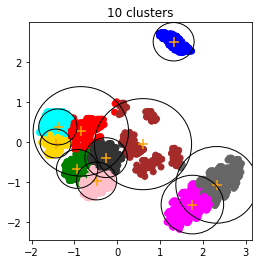

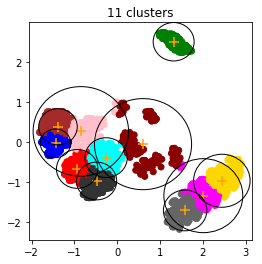

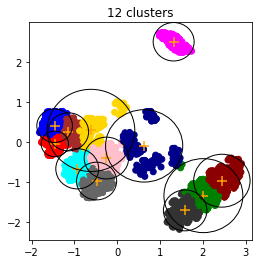

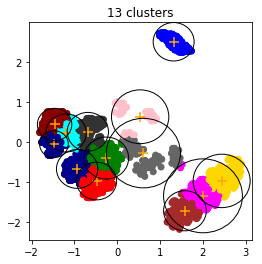

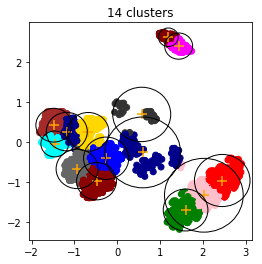

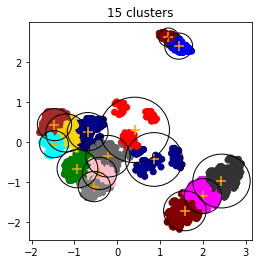

In [20]:
def P3(Xpair,N):
### STUDENT START ###
    k=2
    pc = PCA(n_components=k)
    train_two_comps = pc.fit_transform(train_data)
    Xpair = train_two_comps
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)

    myColors = ["green","blue","magenta","cyan","red","gold","0.2","0.4","pink","brown","darkred","darkblue","darkblue","maroon","grey","olive",]

    myClCols = []
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols.append(myColors[color_index])
    fig = plt.figure(figsize = (4, 4))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols , facecolors='none')
    
    radius = np.zeros(N)

    for i in range(len(clstrs.labels_)):
        cls_no = clstrs.labels_[i]
        distance = ((Xpair[i,0]- clstrs.cluster_centers_[cls_no,0])**2 + (Xpair[i,1]- clstrs.cluster_centers_[cls_no,1])**2)**0.5
        if distance > radius[cls_no]:
            radius[cls_no] = distance

    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = 'orange',marker='+',s=100, linewidths=3)

    for i in range(len(clstrs.cluster_centers_)):
        ax.add_artist(plt.Circle ((clstrs.cluster_centers_[i,0], clstrs.cluster_centers_[i,1]), radius[i], color = 'black',fill=False))

    plt.title (str(N) + " clusters")
    plt.show()

### STUDENT END ###
for nn in range (1, 16):
    P3(train_data, N = nn)


(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

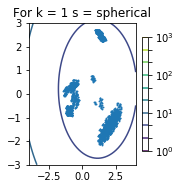

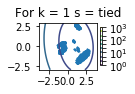

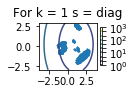

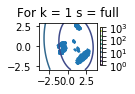

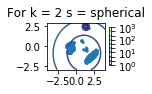

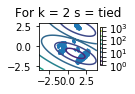

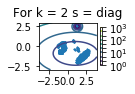

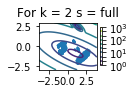

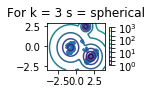

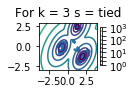

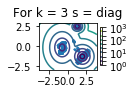

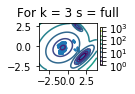

In [21]:
def P4():
    
### STUDENT START ###
    k_list = range(1,4)
    plt.figure(figsize=(11,12))
    pc = PCA(n_components=2)
    train_two_comps = pc.fit_transform(train_data)
    X_train = train_two_comps[np.where(train_labels==1)]
    i=0
    for k in k_list:

        covariance_list = ['spherical', 'tied', 'diag', 'full']
        for covariance_type in covariance_list:
            i=i+1
            clf = GMM(n_components=k, covariance_type=covariance_type)
            clf.fit(X_train)

            # display predicted scores by the model as a contour plot
            plt.subplot(4,4,i)
            x = np.linspace(-4.0, 4.0)
            y = np.linspace(-3.0, 3.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)[0]
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(X_train[:, 0], X_train[:, 1], .8)

            plt.title('For k = %d s = %s'%(k,covariance_type))
            plt.axis('tight')
            plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [33]:
def P5():

### STUDENT START ###

    pc = PCA(n_components=2)
    train_two_comps = pc.fit_transform(train_data)
    X_pos = train_two_comps[train_labels==1]
    X_neg = train_two_comps[train_labels==0]
    pc = PCA(n_components=2)
    test_two_comps = pc.fit_transform(test_data)
    
    clf_pos = GMM(n_components=4, covariance_type='full')
    clf_pos.fit(X_pos)
    score_pos = clf_pos.score(test_two_comps)
    clf_neg = GMM(n_components=4, covariance_type='full')
    clf_neg.fit(X_neg)
    
    score_neg = clf_neg.score(test_two_comps)
    predict = np.array(score_pos >score_neg)
    print predict
    acc_count = 0
    
    print 1.00*np.sum(predict==test_labels)/len(test_labels)
    
### STUDENT END ###

P5()

[ True  True  True ..., False False  True]
0.512455516014


In [26]:
set(train_labels)

{0, 1}

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [6]:
#def P6():
### STUDENT START ###

### STUDENT END ###

#P6()